In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Explore Data

In [44]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [45]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [46]:
data.shape

(918, 12)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [48]:
data.describe

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

In [49]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

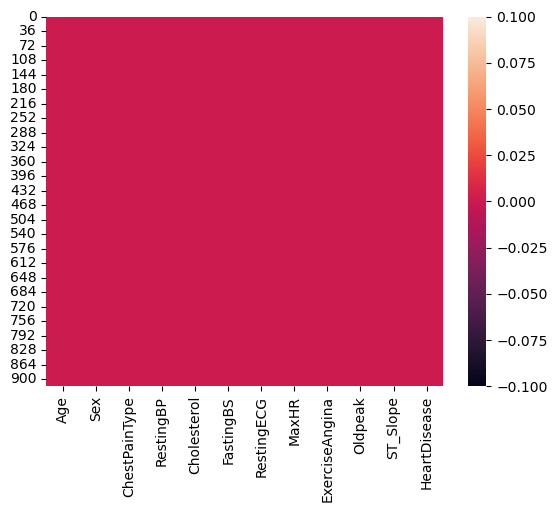

In [50]:
sns.heatmap(data.isnull())

In [51]:
data.duplicated().sum()

0

## Analysis

In [52]:
data.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

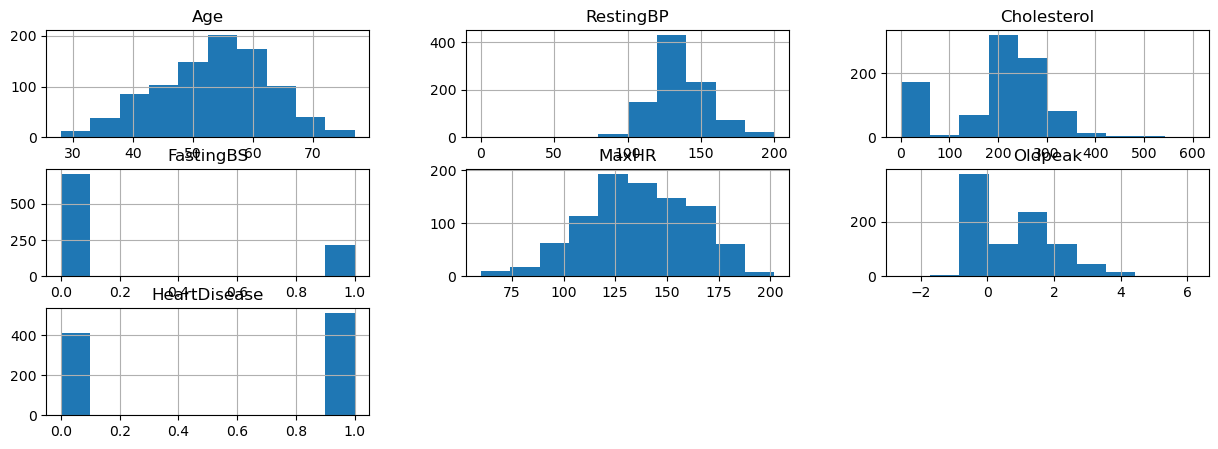

In [53]:
data.hist(figsize=(15,5))
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_18976\2815808028.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

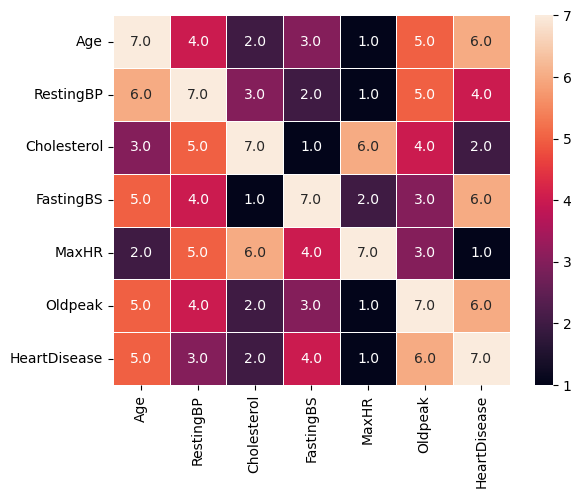

In [54]:
cor = data.corr()
sns.heatmap(cor.rank(axis = 'columns'),annot = True,fmt = '.1f',linewidth = .5)

## Processing Data

In [55]:
lab = LabelEncoder()
obj = data.select_dtypes(include = 'object')
non_obj = data.select_dtypes(exclude = 'object')

In [56]:
for i in range(0,obj.shape[1]):
    obj.iloc[:,i] = lab.fit_transform( obj.iloc[:,i]) 

C:\Users\hp\AppData\Local\Temp\ipykernel_18976\989792969.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  obj.iloc[:,i] = lab.fit_transform( obj.iloc[:,i])
C:\Users\hp\AppData\Local\Temp\ipykernel_18976\989792969.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  obj.iloc[:,i] = lab.fit_transform( obj.iloc[:,i])
C:\Users\hp\AppData\Local\Temp\ipykernel_18976\989792969.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old be

In [57]:
df = pd.concat([obj, non_obj],axis = 1)
df

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,3,1,0,1,45,110,264,0,132,1.2,1
914,1,0,1,0,1,68,144,193,1,141,3.4,1
915,1,0,1,1,1,57,130,131,0,115,1.2,1
916,0,1,0,0,1,57,130,236,0,174,0.0,1


## Model

In [58]:
X = df.drop('HeartDisease',axis = 1)
y = df['HeartDisease']

In [66]:
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size = 80,random_state=22, 
                 shuffle = True)

In [60]:
def all(model):
    model.fit(X_train,y_train)
    pre = model.predict(X_test)
    print(confusion_matrix(pre,y_test)) 
    print(classification_report(pre,y_test))

In [69]:
model1 = KNeighborsClassifier()
all(model1)

[[219 108]
 [160 351]]
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       327
           1       0.76      0.69      0.72       511

    accuracy                           0.68       838
   macro avg       0.67      0.68      0.67       838
weighted avg       0.69      0.68      0.68       838



In [68]:
model2 = DecisionTreeClassifier()
all(model2)

[[266  81]
 [113 378]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       347
           1       0.82      0.77      0.80       491

    accuracy                           0.77       838
   macro avg       0.76      0.77      0.76       838
weighted avg       0.77      0.77      0.77       838



In [67]:
model3 = GaussianNB()
all(model3)

[[300  62]
 [ 79 397]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       362
           1       0.86      0.83      0.85       476

    accuracy                           0.83       838
   macro avg       0.83      0.83      0.83       838
weighted avg       0.83      0.83      0.83       838



In [70]:
model4 = SVC()
all(model4)

[[274 164]
 [105 295]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       438
           1       0.64      0.74      0.69       400

    accuracy                           0.68       838
   macro avg       0.68      0.68      0.68       838
weighted avg       0.68      0.68      0.68       838



In [71]:
model5 = RandomForestClassifier()
all(model5)

[[301  53]
 [ 78 406]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       354
           1       0.88      0.84      0.86       484

    accuracy                           0.84       838
   macro avg       0.84      0.84      0.84       838
weighted avg       0.85      0.84      0.84       838



In [72]:
model6 = GradientBoostingClassifier()
all(model6)

[[271  55]
 [108 404]]
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       326
           1       0.88      0.79      0.83       512

    accuracy                           0.81       838
   macro avg       0.80      0.81      0.80       838
weighted avg       0.82      0.81      0.81       838

